### 🧩 Step 1: Importing Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.1 MB 10.7 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.1 MB 35.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 25.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   ------ --------------------------------- 6.3/41.0 MB 32.3 MB/s eta 0:00:02
   --------- ------------------------------ 9.4/41.0 MB 22.4 MB/s eta 0:00:02
   -------------- ------------------------- 14.7/41.0 MB 22.4 MB/s eta 0:00:02
   ---------------------------- ----------- 28.8/41.0 MB 33.9 MB/s eta 0:00:01
   ---------------------------------------  40.9/41.0 MB 39.7 MB/s eta 0:00:01
   ---------------------------------------- 41.0/41.0 MB 36.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib


  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 23.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 21.6 MB/s eta 0:00:00
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 42.8 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl (2.6 MB)
Note: you may need to r


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 📂 Step 2: Load Your Data

### This reads your dataset into memory, like loading an Excel sheet.

In [7]:
df = pd.read_csv('Merged data.csv')


In [9]:
print(df.columns)


Index(['rounded_time', 'sentiment_score_textblob', 'sentiment_score_vader',
       'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'],
      dtype='object')


### This makes sure that:

Dates are dates

Prices and sentiment scores are numbers

In [12]:

df['rounded_time'] = pd.to_datetime(df['rounded_time'])
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['sentiment_score_vader'] = pd.to_numeric(df['sentiment_score_vader'], errors='coerce')


### 🧱 Step 3: Create Features

### This creates "lag features", which means:

Yesterday’s price

Yesterday’s sentiment

Why? To help the model predict today’s price based on past values.

In [16]:
df['close_lag1'] = df['Close'].shift(1)
df['sentiment_lag1'] = df['sentiment_score_vader'].shift(1)


### ✂️ Step 4: Split the Data

We split the data into:

Training set (used to teach the model)

Testing set (used to test the model’s prediction skills)

🧠 What’s Happening Here?
X = the input variables (yesterday’s price + sentiment)

y = the target to predict (today’s Close price)

train_test_split() = splits your data into:

80% for training

20% for testing

shuffle=False keeps time order (good for time series)

### 🧠 Step 5: Train the Model

Here, we’re using a Linear Regression model — it tries to draw the best-fit line that 
connects the input features to the actual price.

In [20]:
# Create lag features
df['close_lag1'] = df['Close'].shift(1)
df['sentiment_lag1'] = df['sentiment_score_vader'].shift(1)

# 🔥 Drop rows that now contain NaNs
df.dropna(inplace=True)

# Define features and target
features = ['close_lag1', 'sentiment_score_vader', 'sentiment_lag1']
target = 'Close'
X = df[features]
y = df[target]

# Now safely split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### 🎯 Step 6: Make Predictions

Now the model guesses what the price will be based on the test data.

In [22]:
y_pred = model.predict(X_test)


### 📊 Step 7: Evaluate the Model

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate predictions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 162.78
MAE: 72.01
R² Score: 0.9758


### 📈 Step 8: Plot Actual vs Predicted

This draws a graph showing:

The real prices

The predicted prices

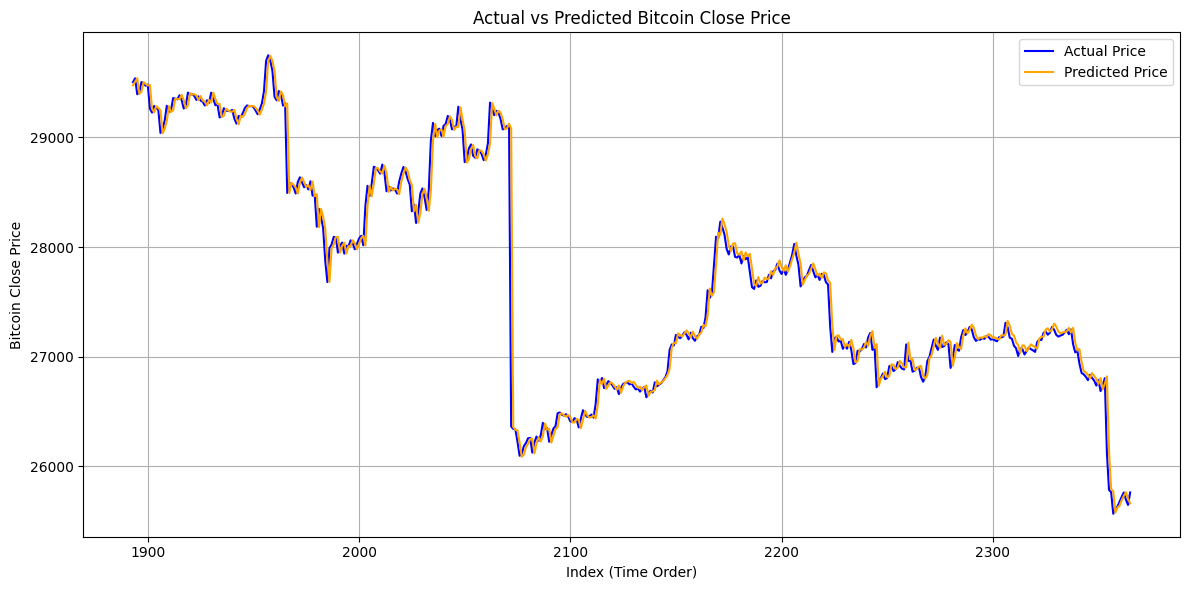

In [26]:
import matplotlib.pyplot as plt

# Ensure the number of predictions matches the test set
plt.figure(figsize=(12, 6))

# Plot actual Close prices
plt.plot(y_test.index, y_test.values, label='Actual Price', color='blue')

# Plot predicted Close prices
plt.plot(y_test.index, y_pred, label='Predicted Price', color='orange')

# Add labels and title
plt.xlabel('Index (Time Order)')
plt.ylabel('Bitcoin Close Price')
plt.title('Actual vs Predicted Bitcoin Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Summary (in super simple terms):
Load your data

Prep your features

Build a basic model

Test the model

Check how good or bad the model did

See the results visually

